In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization 
import matplotlib.pyplot as plt

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

In [2]:
data = pd.read_excel('landslide.xlsx')

In [3]:
data.head()

,Rainfall,ndvi,Slope,Target
0,3,4,8,0
1,5,6,8,1
2,1,5,9,0
3,3,7,9,1
4,1,8,4,0


In [4]:
X = data.iloc[:,:-1]

In [5]:
X.head()

,Rainfall,ndvi,Slope
0,3,4,8
1,5,6,8
2,1,5,9
3,3,7,9
4,1,8,4


In [6]:
Y = data.iloc[:,-1]

In [7]:
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: Target, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.40, random_state=1)

In [9]:
pn1 = Perceptron(tol=1e-3, random_state=0)
pn2 = Perceptron(tol=1e-3, random_state=0)
pn3 = Perceptron(tol=1e-3, random_state=0)

pn1.fit(X_train, y_train)
pn2.fit(X_train1,y_train1)
pn3.fit(X_train2,y_train2)

Perceptron()

In [10]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,pn1.predict(X_test))
cm = confusion_matrix(y_test1,pn2.predict(X_test1))
cm1 = confusion_matrix(y_test2,pn3.predict(X_test2))
print(cm2)
print(cm)
print(cm1)

[[ 3 22]
 [ 0 12]]
[[ 6 29]
 [ 0 21]]
[[25 21]
 [ 0 28]]


Confusion matrix, without normalization
[[ 6 29]
 [ 0 21]]


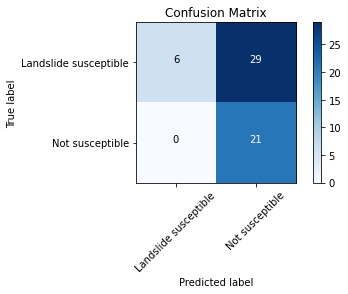

In [11]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [12]:
ee=accuracy_score(y_test,pn1.predict(X_test))
rr=accuracy_score(y_test1,pn2.predict(X_test1))
cc=accuracy_score(y_test2,pn3.predict(X_test2))
dd=precision_score(y_test2,pn3.predict(X_test2))
ff=recall_score(y_test2,pn3.predict(X_test2))
gg=f1_score(y_test2,pn3.predict(X_test2))
hh=precision_score(y_test2,pn1.predict(X_test2))
ii=recall_score(y_test2,pn1.predict(X_test2))
jj=f1_score(y_test2,pn1.predict(X_test2))
kk=precision_score(y_test2,pn2.predict(X_test2))
ll=recall_score(y_test2,pn2.predict(X_test2))
mm=f1_score(y_test2,pn2.predict(X_test2))

In [13]:
print(ee,rr,hh,ii,jj,kk,ll,mm)

0.40540540540540543 0.48214285714285715 0.4307692307692308 1.0 0.6021505376344086 0.417910447761194 1.0 0.5894736842105264


In [14]:
clf1=RandomForestClassifier()
clf2=RandomForestClassifier()
clf3=RandomForestClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train1,y_train1)
clf3.fit(X_train2,y_train2)

RandomForestClassifier()

In [15]:
cm2 = confusion_matrix(y_test,clf1.predict(X_test))
cm = confusion_matrix(y_test1,clf2.predict(X_test1))
cmmmmm3 = confusion_matrix(y_test2,clf3.predict(X_test2))
print(cm2)
print(cm)
print(cmmmmm3)

[[24  1]
 [ 0 12]]
[[34  1]
 [ 0 21]]
[[42  4]
 [ 3 25]]


Confusion matrix, without normalization
[[34  1]
 [ 0 21]]


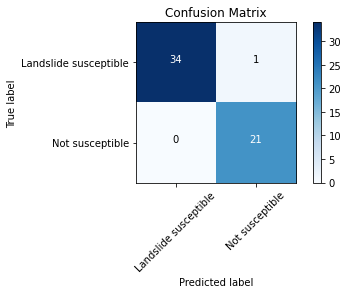

In [16]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [17]:
a=accuracy_score(y_test,clf1.predict(X_test))
b=accuracy_score(y_test1,clf2.predict(X_test1))
c=accuracy_score(y_test2,clf3.predict(X_test2))
d=precision_score(y_test2,clf3.predict(X_test2))
f=recall_score(y_test2,clf3.predict(X_test2))
g=f1_score(y_test2,clf3.predict(X_test2))

In [18]:
print(c,d,f,g)

0.9054054054054054 0.8620689655172413 0.8928571428571429 0.8771929824561403


In [19]:
gnb1 = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()

gnb1.fit(X_train,y_train)
gnb2.fit(X_train1,y_train1)
gnb3.fit(X_train2,y_train2)

GaussianNB()

In [20]:
cm2 = confusion_matrix(y_test,gnb1.predict(X_test))
cm = confusion_matrix(y_test1,gnb2.predict(X_test1))
cm1 = confusion_matrix(y_test2,gnb3.predict(X_test2))
print(cm2)
print(cm)
print(cm1)

[[22  3]
 [ 0 12]]
[[32  3]
 [ 0 21]]
[[40  6]
 [ 1 27]]


Confusion matrix, without normalization
[[32  3]
 [ 0 21]]


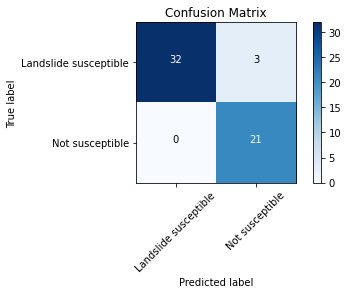

In [21]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [22]:
d=accuracy_score(y_test,gnb1.predict(X_test))
e=accuracy_score(y_test1,gnb2.predict(X_test1))
f=accuracy_score(y_test2,gnb3.predict(X_test2))
g=precision_score(y_test2,gnb3.predict(X_test2))
h=recall_score(y_test2,gnb3.predict(X_test2))
i=f1_score(y_test2,gnb3.predict(X_test2))
print(f,g,h,i)

0.9054054054054054 0.8181818181818182 0.9642857142857143 0.8852459016393442


In [23]:
cl1 = svm.SVC(gamma='scale')
cl2 = svm.SVC(gamma='scale')
cl3 = svm.SVC(gamma='scale')

cl1.fit(X_train,y_train)
cl2.fit(X_train1,y_train1)
cl3.fit(X_train2,y_train2)

SVC()

In [24]:
cm2 = confusion_matrix(y_test,cl1.predict(X_test))
cm = confusion_matrix(y_test1,cl2.predict(X_test1))
cm1 = confusion_matrix(y_test2,cl3.predict(X_test2))
print(cm2)
print(cm)
print(cm1)

[[23  2]
 [ 0 12]]
[[33  2]
 [ 0 21]]
[[44  2]
 [ 1 27]]


Confusion matrix, without normalization
[[33  2]
 [ 0 21]]


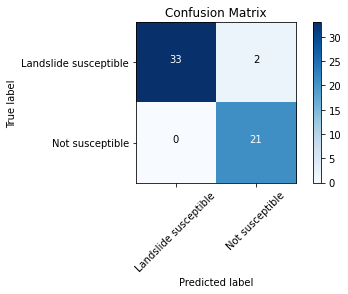

In [25]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [26]:
g=accuracy_score(y_test,cl1.predict(X_test))
h=accuracy_score(y_test1,cl2.predict(X_test1))
i=accuracy_score(y_test2,cl3.predict(X_test2))
j=precision_score(y_test2,cl3.predict(X_test2))
k=recall_score(y_test2,cl3.predict(X_test2))
l=f1_score(y_test2,cl3.predict(X_test2))


print(i,j,k,l)

0.9594594594594594 0.9310344827586207 0.9642857142857143 0.9473684210526316


In [27]:
result1 = LogisticRegression(random_state = 0)
result2 = LogisticRegression(random_state = 0)
result3 = LogisticRegression(random_state = 0)

result1.fit(X_train,y_train)
result2.fit(X_train1,y_train1)
result3.fit(X_train2,y_train2)



LogisticRegression(random_state=0)

In [28]:
cm2 = confusion_matrix(y_test,result1.predict(X_test))
cm = confusion_matrix(y_test1,result2.predict(X_test1))
cm1 = confusion_matrix(y_test2,result3.predict(X_test2))
print(cm2)
print(cm)
print(cm1)

[[25  0]
 [ 0 12]]
[[35  0]
 [ 0 21]]
[[46  0]
 [ 1 27]]


Confusion matrix, without normalization
[[35  0]
 [ 0 21]]


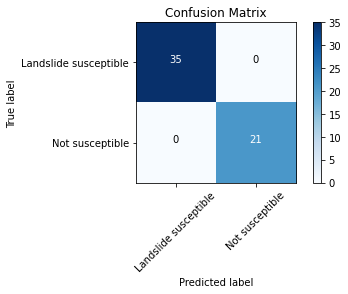

In [29]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
j=accuracy_score(y_test,result1.predict(X_test))
k=accuracy_score(y_test1,result2.predict(X_test1))
l=accuracy_score(y_test2,result3.predict(X_test2))
m=precision_score(y_test2,result3.predict(X_test2))
n=recall_score(y_test2,result3.predict(X_test2))
o=f1_score(y_test2,result3.predict(X_test2))
print(l,m,n,o)

0.9864864864864865 1.0 0.9642857142857143 0.9818181818181818


In [31]:
clff1 = DecisionTreeClassifier(random_state=0)
clff2 = DecisionTreeClassifier(random_state=0)
clff3 = DecisionTreeClassifier(random_state=0)

clff1.fit(X_train,y_train)
clff2.fit(X_train1,y_train1)
clff3.fit(X_train2,y_train2)



DecisionTreeClassifier(random_state=0)

In [32]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,clff1.predict(X_test))
cm = confusion_matrix(y_test1,clff2.predict(X_test1))
cm1 = confusion_matrix(y_test2,clff3.predict(X_test2))
print(cm2)
print(cm)
print(cm)

[[24  1]
 [ 0 12]]
[[34  1]
 [ 1 20]]
[[34  1]
 [ 1 20]]


Confusion matrix, without normalization
[[34  1]
 [ 1 20]]


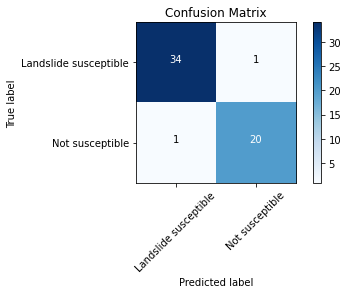

In [33]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(12, 9)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm_plot_labels = ['Landslide susceptible','Not susceptible']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [34]:
m=accuracy_score(y_test,clff1.predict(X_test))
n=accuracy_score(y_test1,clff2.predict(X_test1))
o=accuracy_score(y_test2,clff3.predict(X_test2))
p=precision_score(y_test2,clff3.predict(X_test2))
q=recall_score(y_test2,clff3.predict(X_test2))
r=f1_score(y_test2,clff3.predict(X_test2))

print(o,p,q,r)

0.8648648648648649 0.8 0.8571428571428571 0.8275862068965518
